## Part 1: Experiments with the Tensorflow and MINST Dataset
#### Linear Model

### Reference:
1. https://www.tensorflow.org/get_started/mnist/beginners
2. https://www.tensorflow.org/get_started/mnist/pros
3. https://github.com/tensorflow/tensorflow/tree/master/tensorflow/examples/tutorials/mnist
4. http://web.stanford.edu/class/cs20si/
5. https://github.com/Hvass-Labs/TensorFlow-Tutorials
6. https://www.oreilly.com/learning/not-another-mnist-tutorial-with-tensorflow
7. https://github.com/martin-gorner/tensorflow-mnist-tutorial
8. https://github.com/aymericdamien/TensorFlow-Examples
9. http://yann.lecun.com/exdb/mnist/

In [2]:
# Import libraries
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np

%matplotlib inline

In [3]:
#Get data from Tensorflow's tutorial website
from tensorflow.examples.tutorials.mnist import input_data
data = input_data.read_data_sets("data/MNIST/", one_hot=True)

Extracting data/MNIST/train-images-idx3-ubyte.gz
Extracting data/MNIST/train-labels-idx1-ubyte.gz
Extracting data/MNIST/t10k-images-idx3-ubyte.gz
Extracting data/MNIST/t10k-labels-idx1-ubyte.gz


In [8]:
# Data Exploration:
# Image Data
print("Training Image Shape/Size:", np.shape(data.train.images))
print("Training Labels Shape/Size:", np.shape(data.train.labels))

Training Image Shape/Size: (55000, 784)
Training Labels Shape/Size: (55000, 10)


There are 55000 images with each image being 784 pixels. From the MINST website we also know that images are 28 X 28 pixels.

The output labels are one-hot encoded hence each column of the output has one entry that corresponds to the correct class and rest of the entries should be zero.

In [9]:
#Test set:
print("Test Image Shape/Size:", np.shape(data.test.images))
print("Test Labels Shape/Size:", np.shape(data.test.labels))

Test Image Shape/Size: (10000, 784)
Test Labels Shape/Size: (10000, 10)


There are10000 test images with each image being 784 pixels. The test images also have the same 28 X 28 dimension. The output labels here are one-hot encoded as well.

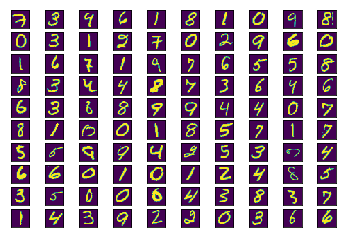

In [12]:
#Plotting a visualization of the images.
fig, axes = plt.subplots(10,10)
for i, ax in enumerate(axes.flat):
    ax.imshow(data.train.images[i].reshape((28,28)))
    ax.set_xticks([])
    ax.set_yticks([])

In [13]:
#Setting up constant values
img_height = 28
img_width = 28
img_flat = img_height * img_width
img_shape = (img_height, img_width)
num_classes = 10


In [14]:
#Setting up and running Tensorflow variables:
x = tf.placeholder(tf.float32, [None, img_flat])
labels = tf.placeholder(tf.float32, [None, num_classes])
class_labels = tf.placeholder(tf.int64, [None])

In [15]:
weights = tf.Variable(tf.zeros([img_flat, num_classes]))
biases = tf.Variable(tf.zeros([num_classes]))
logits = tf.matmul(x, weights) + biases
y_pred = tf.nn.softmax(logits)
pred_class = tf.argmax(y_pred, dimension = 1)

In [40]:
train_labels = np.array([label.argmax() for label in data.train.labels])
feed_dict_train = {x: data.train.images,
                 labels: data.train.labels,
                 class_labels: train_labels}

In [33]:
test_labels = np.array([label.argmax() for label in data.test.labels])
feed_dict_test = {x: data.test.images,
                 labels: data.test.labels,
                 class_labels: test_labels}

In [16]:
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits = logits, labels = labels)
cost = tf.reduce_mean(cross_entropy)
optimizer = tf.train.GradientDescentOptimizer(learning_rate = 0.5).minimize(cost)
correct_prediction = tf.equal(pred_class, class_labels)
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [17]:
session = tf.Session()
session.run(tf.global_variables_initializer())
batch_size = 100
x_batch, y_true_batch = data.train.next_batch(64)

In [25]:
def optimize(num_iterations):
    for i in range(num_iterations):
        img_batch, labels_batch = data.train.next_batch(batch_size)
        feed_dict_train = {x: img_batch, labels : labels_batch}
        writer = tf.summary.FileWriter('./Part1_MINST', session.graph)
        session.run(optimizer, feed_dict = feed_dict_train)
    writer.close()

In [41]:
def Train_Data_Accuracy():
    acc = session.run(accuracy, feed_dict = feed_dict_train)
    print("Accuracy on Training Data: {0:.3%}".format(acc))

In [42]:
def Test_Data_Accuracy():
    acc = session.run(accuracy, feed_dict = feed_dict_test)
    print("Accuracy on Test Data: {0:.3%}".format(acc))

In [43]:
def visualize_weights():
    w = session.run(weights)
    
    w_min = np.min(w)
    w_max = np.max(w)
    
    fig, axes = plt.subplots(3,4)   
    for i, ax in enumerate(axes.flat):
        if(i<10):
            image = w[:,i].reshape(img_shape)
            ax.set_xlabel("Weights:".format(i))
            ax.imshow(image, vmin = w_min, vmax = w_max)
        
        ax.set_xticks([])
        ax.set_yticks([])

In [45]:
print_accuracy()

Accuracy on Test Data: 92.150%


In [51]:
for i in range(1,5):
    optimize(num_iterations = i)
    print("\nIteration Number:{0} ".format(i))
    Train_Data_Accuracy()
    Test_Data_Accuracy()


Iteration Number:1 
Accuracy on Training Data: 92.427%
Accuracy on Test Data: 91.880%

Iteration Number:2 
Accuracy on Training Data: 92.587%
Accuracy on Test Data: 92.160%

Iteration Number:3 
Accuracy on Training Data: 92.571%
Accuracy on Test Data: 92.160%

Iteration Number:4 
Accuracy on Training Data: 92.738%
Accuracy on Test Data: 92.280%


In [80]:
session.close()